# Modeling 
In this part we will be exploring different models in order to classify songs according to their features.

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

## Loading data

In [145]:
df = pd.read_csv('standardized_data.csv')
df = shuffle(df)

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
12638,-1.35,-1.17,1.53,-0.94,-1.10,0.93,-0.12,-0.84,-0.22,-0.40,1.57,-0.32,Hiphop
6770,0.85,-0.97,1.26,-0.58,-1.10,-0.25,2.89,-0.84,-0.57,0.27,1.70,-0.99,Underground Rap
846,-0.98,-2.22,-1.47,-1.71,0.91,-0.85,1.65,-0.84,1.17,-1.26,1.09,-1.15,Dark Trap
12350,1.51,-0.62,-0.11,0.34,-1.10,-0.75,0.07,-0.84,1.05,2.51,-1.34,-0.78,Pop
7985,-0.12,0.67,-0.38,0.87,-1.10,2.97,0.57,-0.84,-0.64,0.67,0.14,-1.01,Trap Metal


In [146]:
X = df[['danceability', 'energy', 'loudness', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms']].to_numpy()
y = df[['genre']].to_numpy().ravel()

models_performance = []


Splitting data into training (60%) testing (20%) and validation (20%)

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19669, 12) (19669,)
(6557, 12) (6557,)


# Model training

## Logistic Regression

Tuning hyperparameters...
Validation Accuracy: 0.61


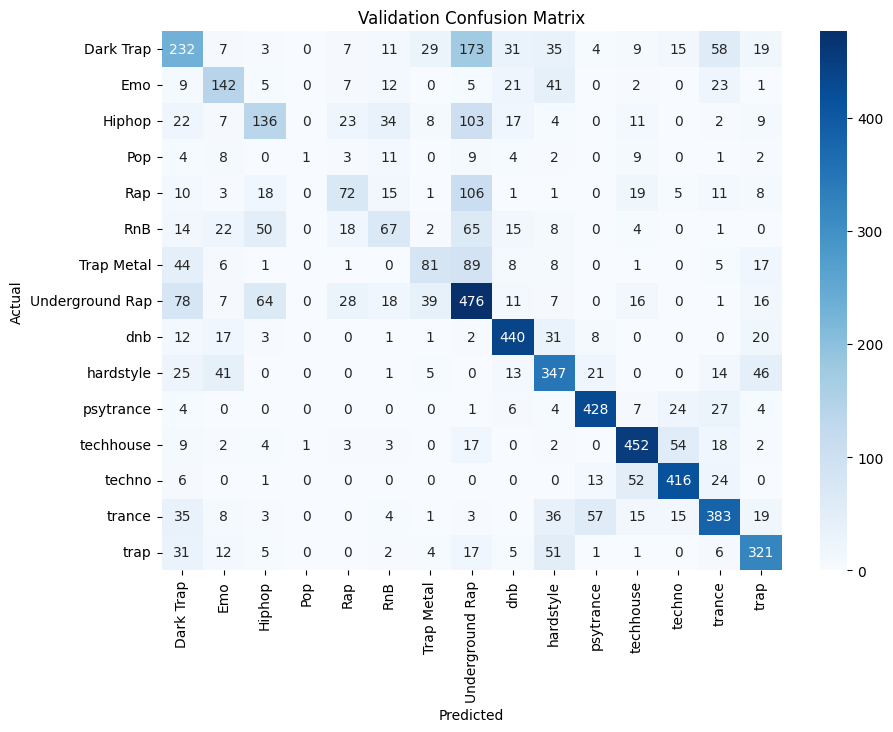

Test Accuracy: 0.61


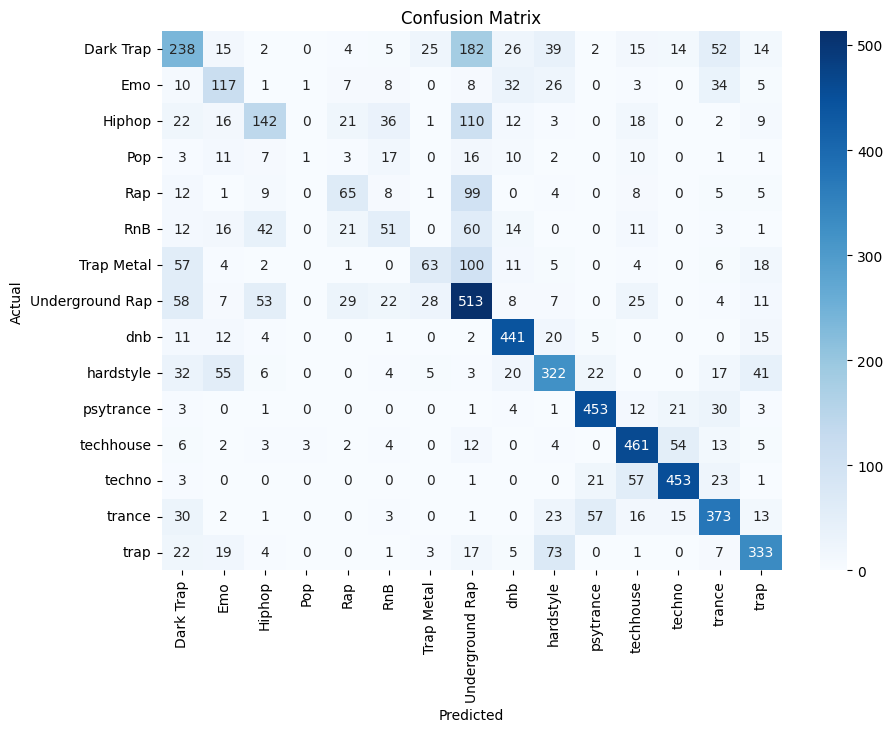

In [148]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier =    LogisticRegression(max_iter=1000)

hyper_params_grid = dict({'C': [0.01, 0.1, 1, 10, 100]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(logistic_regression_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [149]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "LogisticRegression",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Decision Tree Classifier

Tuning hyperparameters...
Validation Accuracy: 0.66


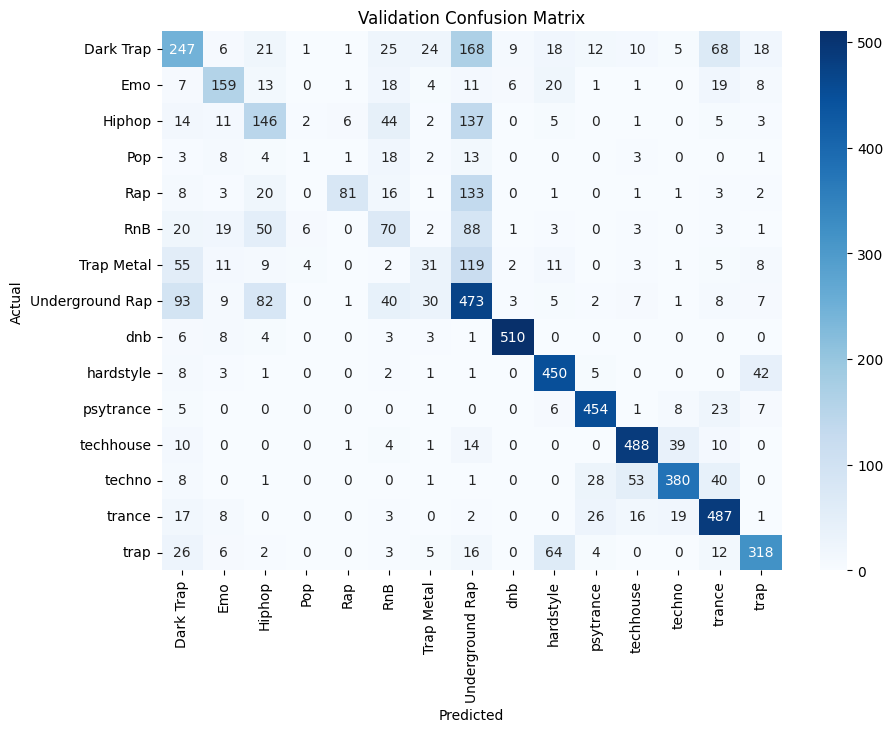

Test Accuracy: 0.65


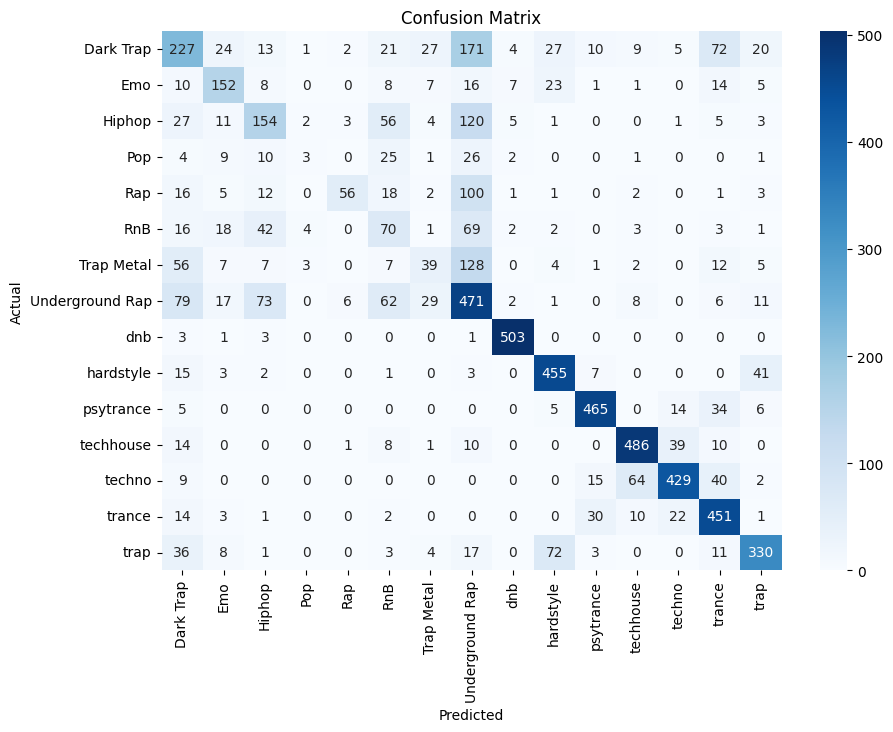

In [150]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier =  DecisionTreeClassifier()

hyper_params_grid = dict({'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(decision_tree_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [151]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "DecisionTreeClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Random Forest Classifier

Tuning hyperparameters...
Validation Accuracy: 0.70


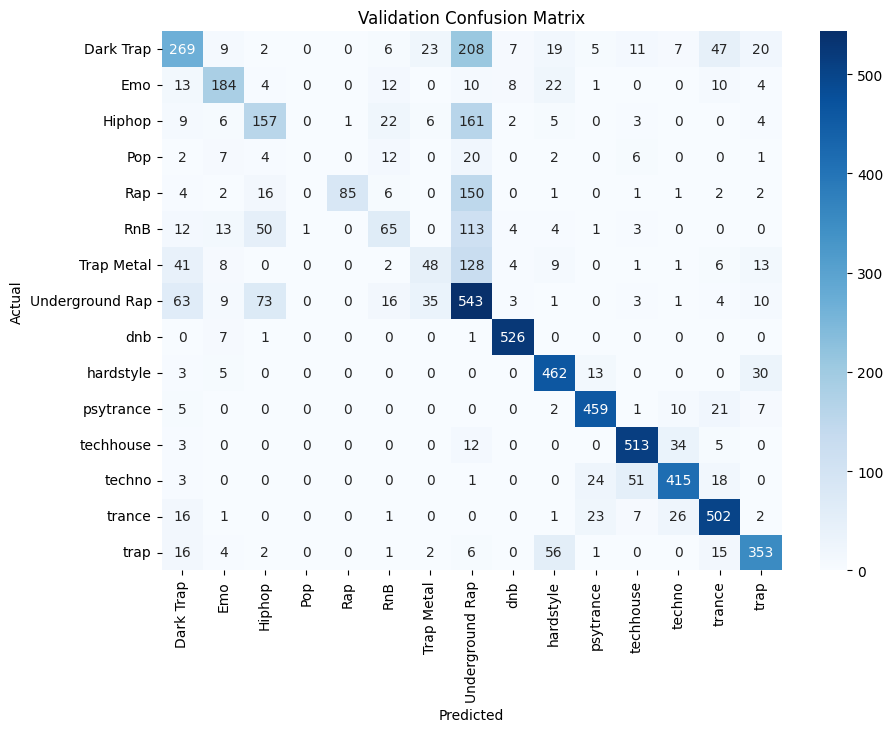

Test Accuracy: 0.70


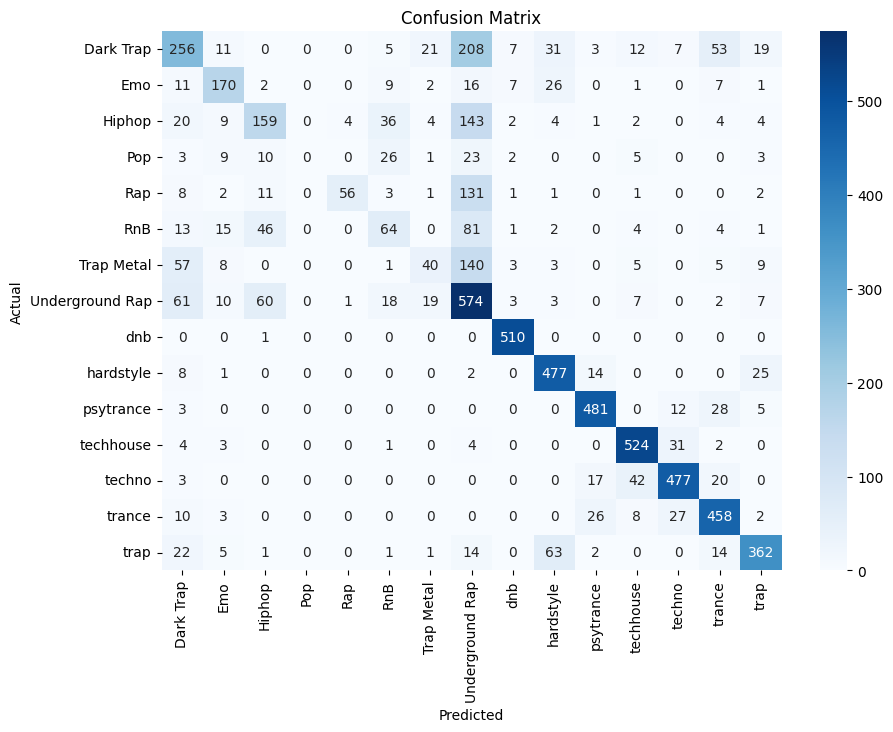

In [152]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier =  RandomForestClassifier()

hyper_params_grid = dict({'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 10, 20, 30]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(random_forest_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [153]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "RandomForestClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## SVM

Tuning hyperparameters...
Validation Accuracy: 0.69


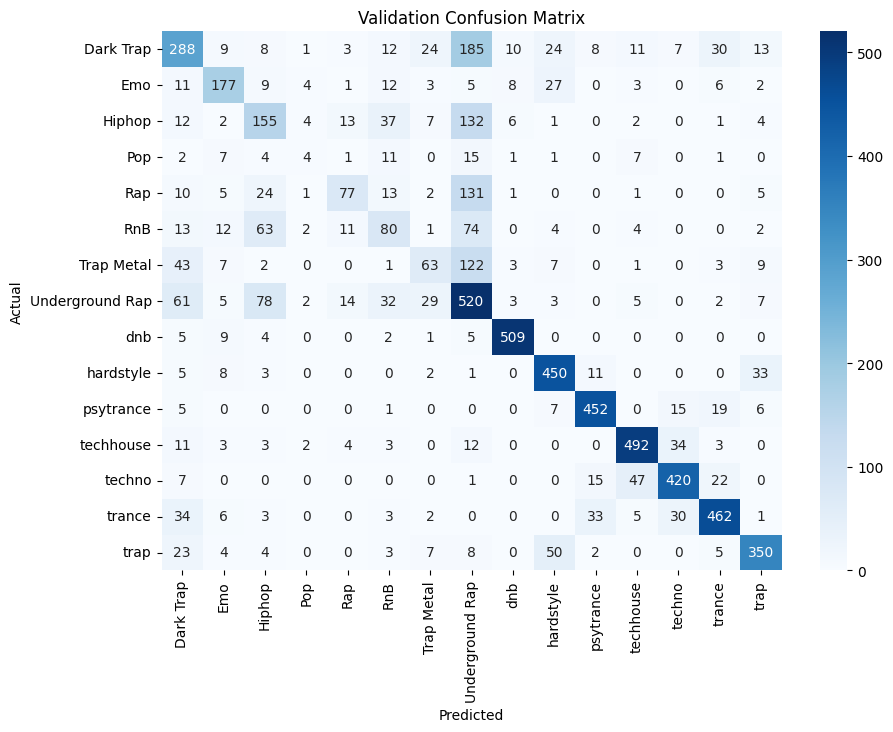

Test Accuracy: 0.69


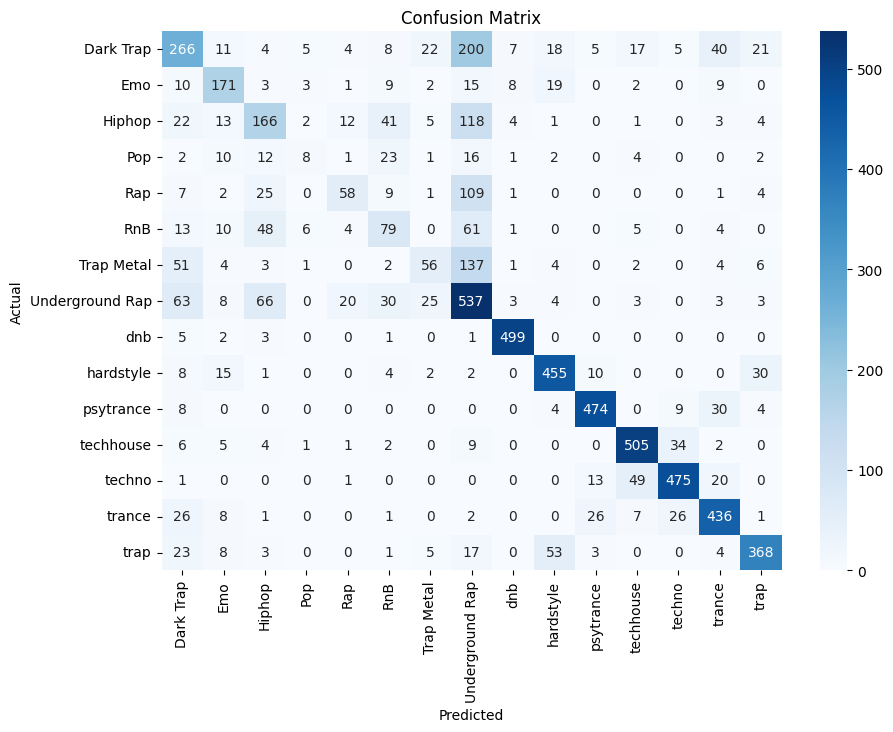

In [154]:
from sklearn.svm import SVC
svm_classifier =  SVC()

hyper_params_grid = dict({'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(svm_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [155]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "SVM",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

### KNeighbors

Tuning hyperparameters...
Validation Accuracy: 0.60


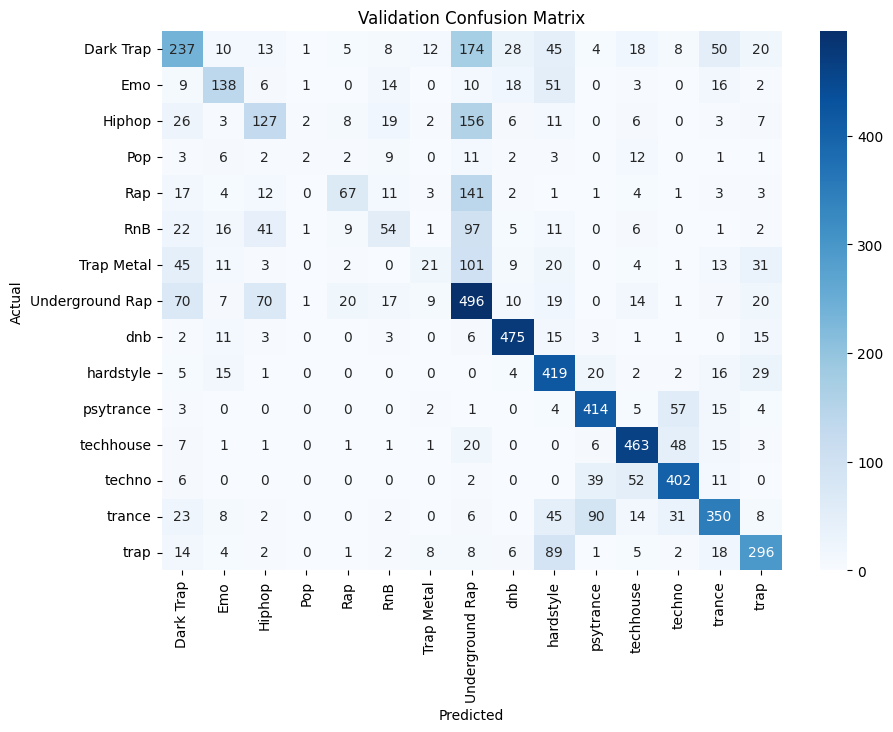

Test Accuracy: 0.60


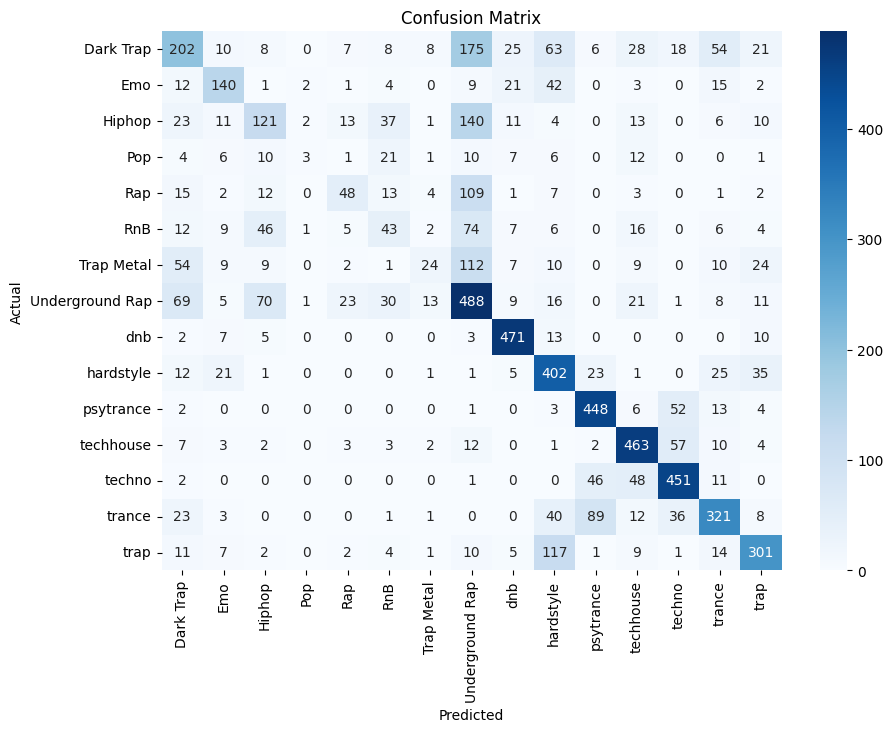

In [156]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors_classifier =  KNeighborsClassifier()

hyper_params_grid = dict({'n_neighbors': np.arange(2, 30, 1)})
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(kneighbors_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [157]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "KNeighborsClassifier",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Naive Bayes

Tuning hyperparameters...
Validation Accuracy: 0.63


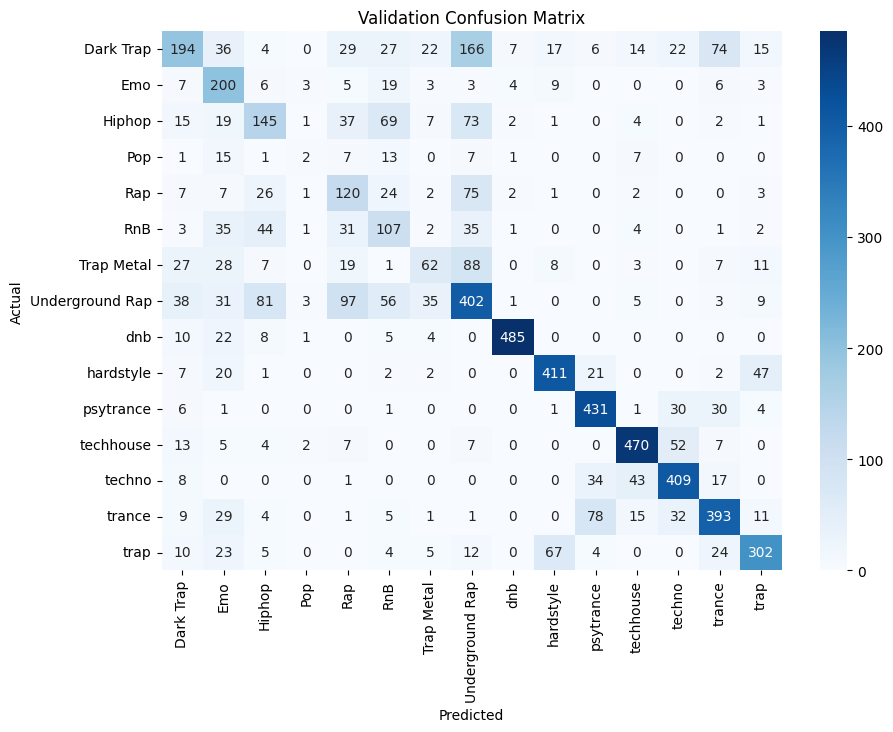

Test Accuracy: 0.63


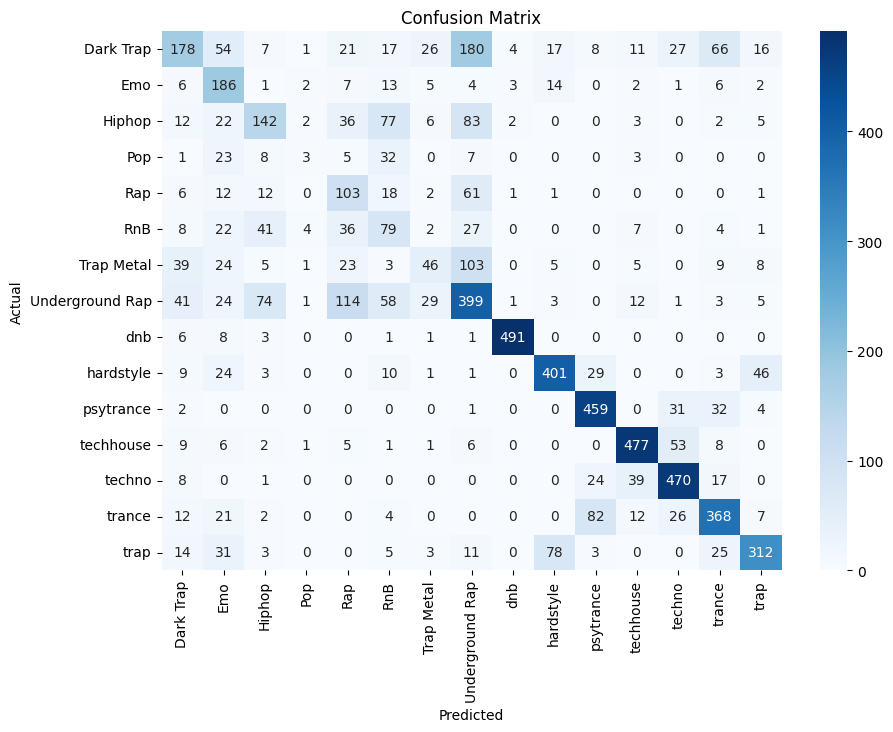

In [158]:

from sklearn.naive_bayes import GaussianNB

kneighbors_classifier =  GaussianNB()

hyper_params_grid = dict({'var_smoothing': np.logspace(0,-9, num=100)})

print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(kneighbors_classifier, hyper_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
    
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [159]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "GaussianNB",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## Multi-layer Perceptron (Neural Network)

Tuning hyperparameters...


/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohamedlouaibouzaher/Desktop/UPC/ML/project/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

Validation Accuracy: 0.70


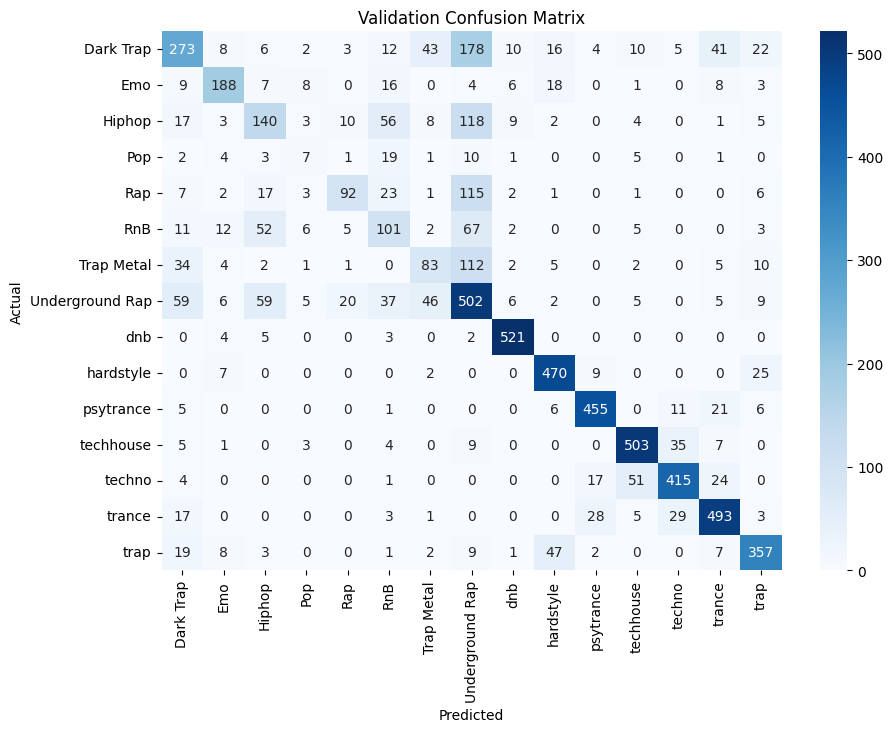

Test Accuracy: 0.70


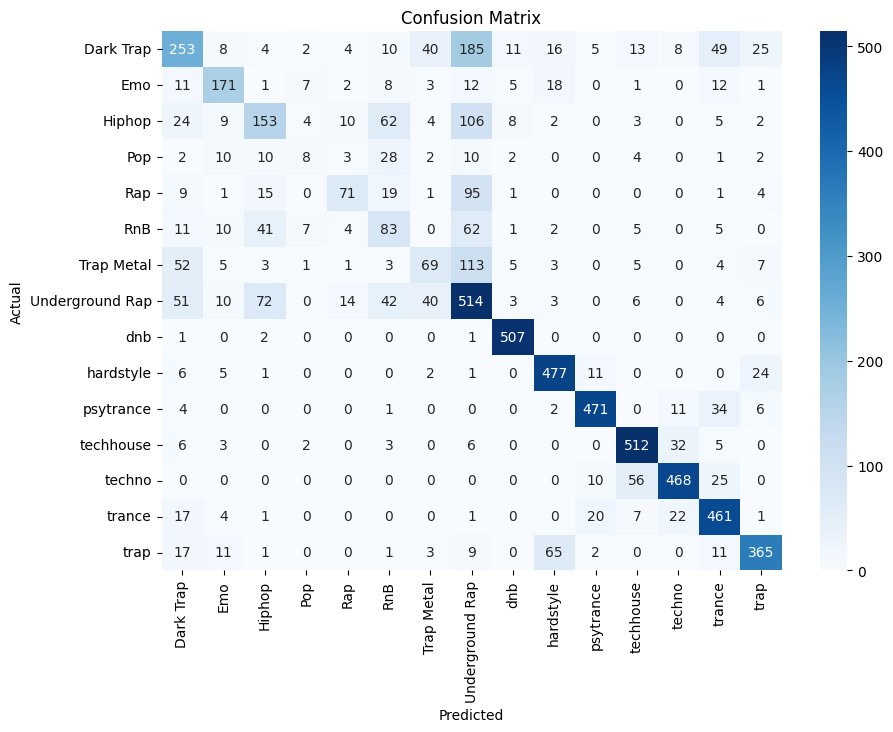

In [160]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(max_iter=1000)

hyper_params_grid = dict(
    {
        "hidden_layer_sizes": [
            (100,),
            (100, 100),
            (
                100,
                100,
                100,
            ),
        ],
        "activation": ["tanh", "relu"],
        "solver": ["sgd", "adam"],
        "alpha": [0.0001, 0.05],
        "learning_rate": ["constant", "adaptive"],
    }
)
print(f"Tuning hyperparameters...")
grid_search = GridSearchCV(
    mlp_classifier, hyper_params_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

cm_val = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_val_df = pd.DataFrame(cm_val, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, fmt="d", cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [161]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "MLP",
        "model": best_model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

## CNN - Sequential

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,663 (45.56 KB)

 Trainable params: 11,279 (44.06 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4159 - loss: 1.9682 - val_accuracy: 0.6271 - val_loss: 1.2300 - learning_rate: 0.0010
Epoch 2/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.5836 - loss: 1.3271 - val_accuracy: 0.6603 - val_loss: 1.1032 - learning_rate: 0.0010
Epoch 3/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.6208 - loss: 1.2079 - val_accuracy: 0.6730 - val_loss: 1.0342 - learning_rate: 0.0010
Epoch 4/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6290 - loss: 1.1537 - val_accuracy: 0.6792 - val_loss: 1.0036 - learning_rate: 0.0010
Epoch 5/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6346 - loss: 1.1275 - val_accuracy: 0.6785 - val_loss: 0.9937 - learning_rate: 0.0010
Epoch 6/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.6519 - loss: 1.0821 - val_accuracy: 0.6821 - val_loss: 0.9624 - learning_rate: 0.0010
Epoch 7/100
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6507 - lo

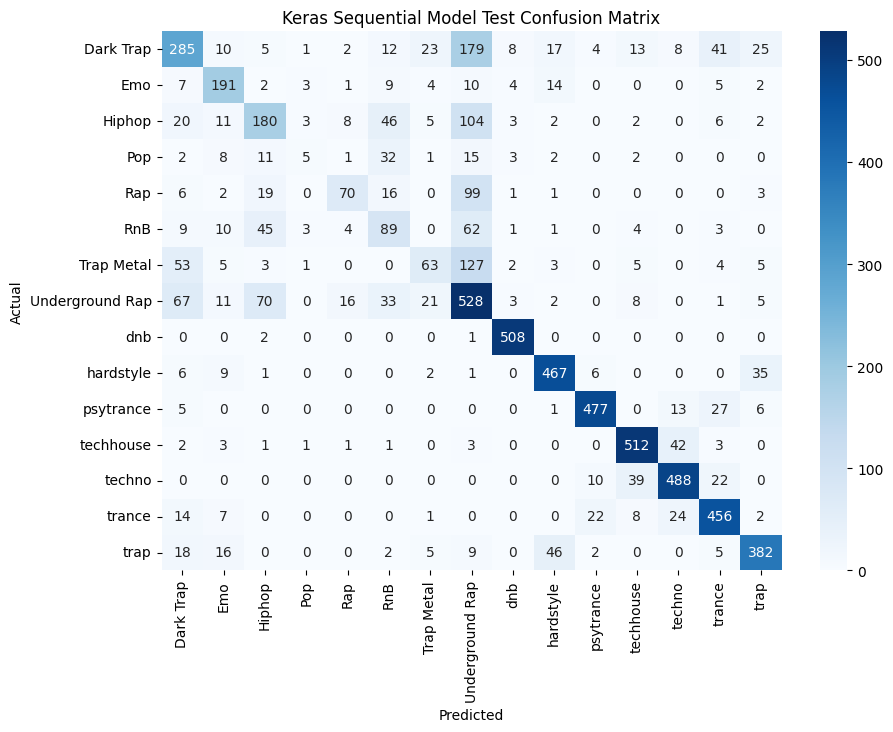

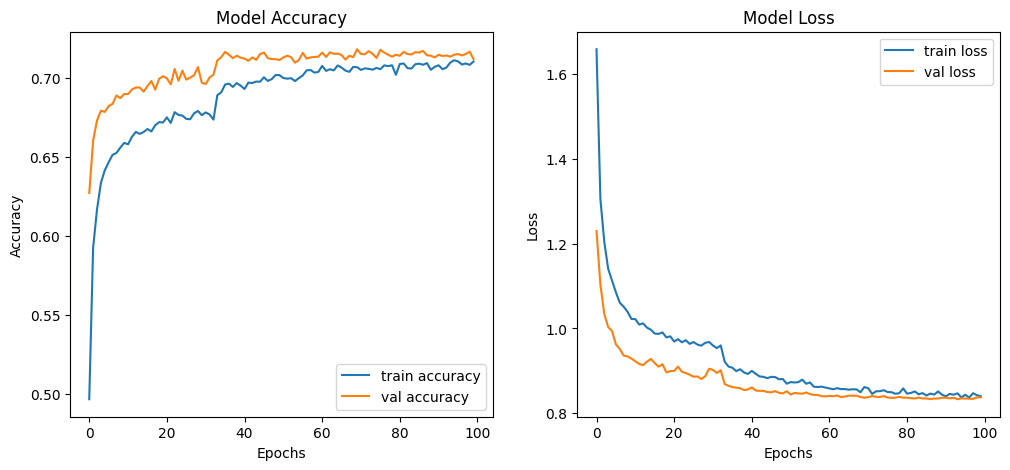

In [162]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


y_encoded = pd.get_dummies(y).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm_test = confusion_matrix(y_test_actual, y_test_pred)
cm_test_df = pd.DataFrame(cm_test, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_df, annot=True, fmt='d', cmap='Blues')
plt.title('Keras Sequential Model Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [163]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
test_f1 = f1_score(y_test_actual, y_test_pred, average='weighted')

models_performance.append(
    {
        "type": "CNN",
        "model": model,
        "test_accuracy": test_accuracy,
        "test_f1": test_f1,
    }
)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


## Comparing Models Performance


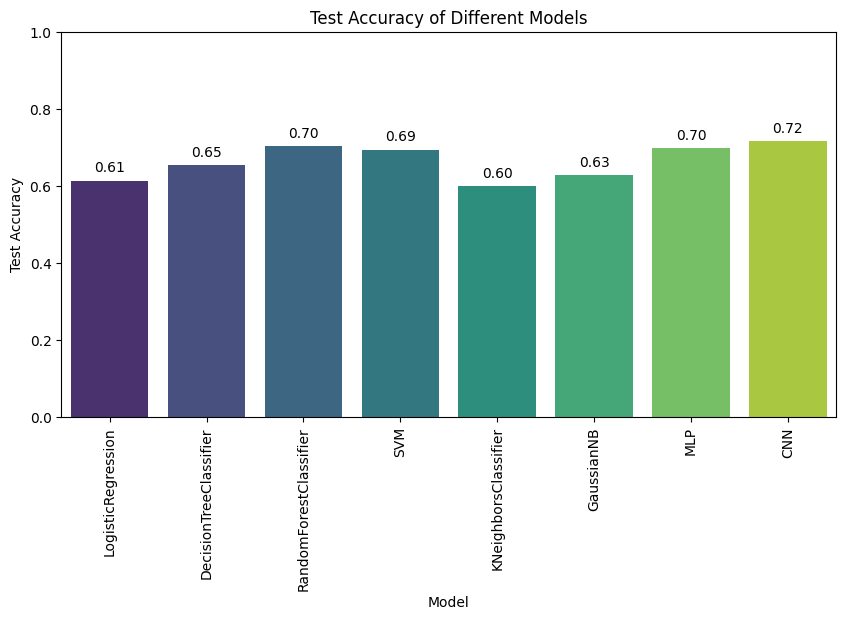

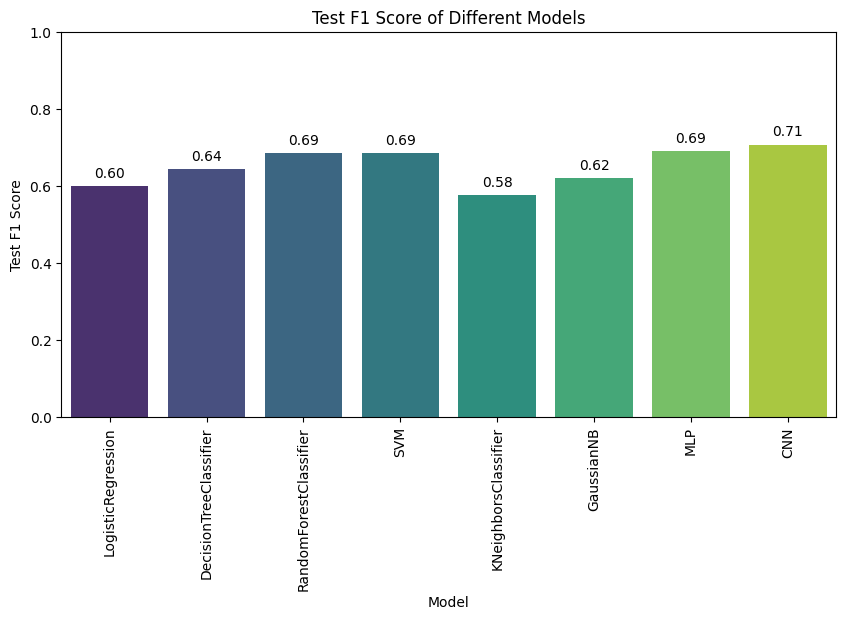

In [164]:
df_performance = pd.DataFrame(models_performance)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='type', y='test_accuracy', hue='type', data=df_performance, palette='viridis', legend=False)
plt.title('Test Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
ax =sns.barplot(x='type', y='test_f1',hue='type', data=df_performance, palette='viridis', legend=False)
plt.title('Test F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.ylim(0, 1)  
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()



### Observations 

- This analysis shows how many song genres were closely related according to the features which makes the classification task difficult even after data preprocessing and models hyper-parameters tuning. 

- For example, most classifiers confuse 'Underground Rap' with 'Dark Trap' which goes back to the similarities in their features.

- CNN shows the best performance compared to other models with an accuracy score of `0.72` and F1 Score of `0.71`. Random Forest Classifier and MLP come second with a close accuracy score of `0.70` and F1 Score of `0.69`